# Plan

The Landau-Zenner equation gives estimation for crossing in two states hamiltonian: $P_D = e^ {-2\pi\Gamma}$ we wish to examine the behavior of the transition in the region where  $P_D$ is not very close to 0 or 1.

In [1]:
%matplotlib inline

from IPython.display import Image,display

from numpy import pi

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import LH_tools

# from importlib import reload 
# reload(LH_tools)

In [53]:
H0, psi0 = LH_tools.gen_simple_ham(3)
# rotate by hadamard transform 
rot_H0, rot_psi0 = LH_tools.rotate_by_had(H0, psi0)
LH = LH_tools.gen_SAT_LH()
h_t= [[rot_H0,'(t_max-t)/t_max'],
      [LH, 't/t_max']]



This is the two hamiltonians we will use with in this demo

In [54]:
display(rot_H0)
display(LH)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 0.875 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125  0.875 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125  0.875 -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125  0.875 -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125  0.875 -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125  0.875 -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125 -0.125  0.875 -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125  0.875]]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]

In [3]:
P_per_speed = []
evals_per_speed = []
for speed in range(1,20):
    tlist = np.linspace(0, speed, 200)
    args = {'t_max': max(tlist)}
    P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, rot_psi0, False)
    P_per_speed.append(P_mat)
    evals_per_speed.append(evals_mat)
    

In [ ]:
#Create data for original hamiltonians without the random term
h_t = [[rot_H0,'(t_max-t)/t_max'],
         [LH, 't/t_max']]


#Compute list of probabilities:
list_of_pr_for_psi0_in_end = []
list_of_pr_for_psi0_in_mid = []
for speed in range(1,20):
    tlist = np.linspace(0, speed, 200)
    args = {'t_max': max(tlist),'tlist':tlist,'p':9/10}
    P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, rot_psi0, False)
    list_of_pr_for_psi0_in_end.append(P_mat[-1][0])
pr_of_jump_in_end_orig = np.ones(19)-list_of_pr_for_psi0_in_end

## Plot the occupation probabilities for two states  

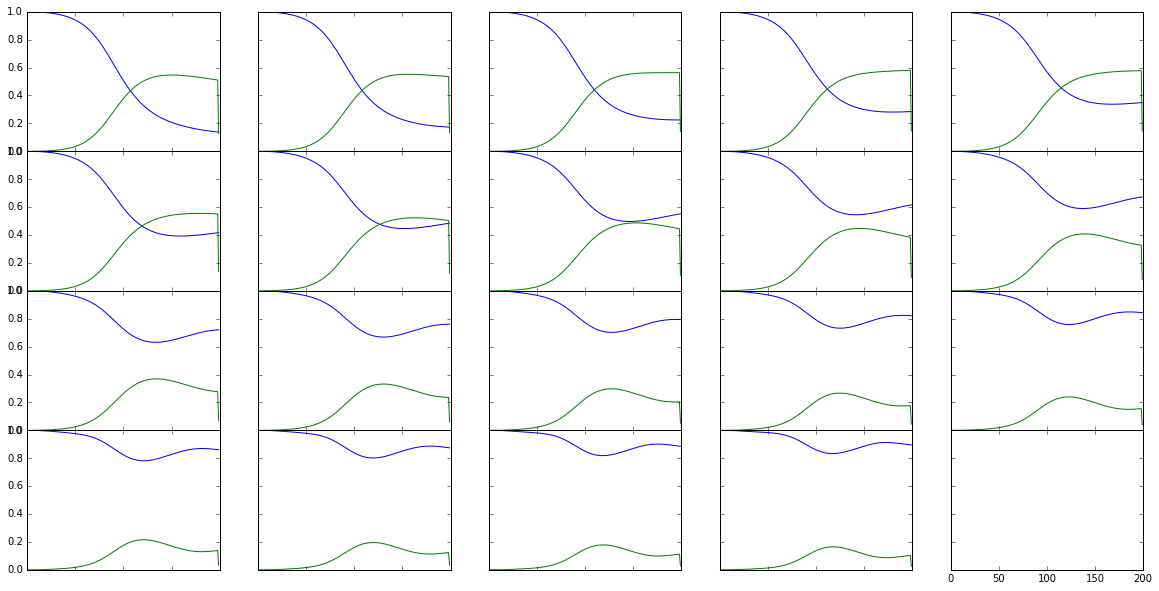

In [50]:
plotarr = []
speed = 0
f, plotarr = plt.subplots(4,5, sharex=True, sharey=True,figsize=(20,10))
try:
    for plot_group in plotarr:
        for plot in plot_group:
            plot.plot(P_per_speed[speed])
            speed+=1
except IndexError:
    pass # ignore
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
f.subplots_adjust(hspace=0)

plt.show()


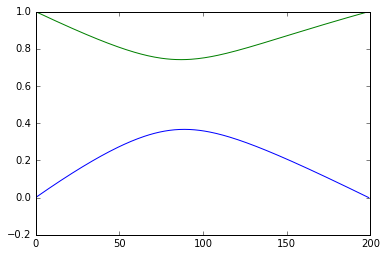

In [58]:
# Energies 
plt.plot(evals_per_speed[0])
plt.show()
